<a href="https://colab.research.google.com/github/jaesunkkk/22/blob/main/1203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 113 kB 46.6 MB/s 
     |████████████████████████████████| 2.0 MB 37.9 MB/s 
     |████████████████████████████████| 167 kB 45.2 MB/s 
     |████████████████████████████████| 1.7 MB 47.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 38.5 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 1.3 MB 32.6 MB/s 
     |████████████████████████████████| 15.5 MB 33.4 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 261 kB 39.3 MB/s 
     |████████████████████████████████| 3.1 MB 41.4 MB/s 
     |████████████████████████████████| 102 kB 10.3 MB/s 
     |████████████████████████████████| 675 kB 42.5 MB/s 
     |█████████████████

In [3]:
from pycaret.regression import *
import numpy as np 
import pandas as pd 
from pandas_profiling import ProfileReport 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df_train = pd.read_csv('/content/drive/MyDrive/essa/데이터/train (5).csv')
df_test = pd.read_csv('/content/drive/MyDrive/essa/데이터/test (1).csv')
df_sample_submission = pd.read_csv('/content/drive/MyDrive/essa/데이터/sample_submission.csv')
df_train['SalePrice'] = df_train['SalePrice'].astype(int)

pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

# plot 표기
%matplotlib inline

In [4]:
print('\n \n First 5 row of Train Data : ')
display(df_train.head())

print('First 5 row of Test Data : ')
display(df_test.head())


 
 First 5 row of Train Data : 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


First 5 row of Test Data : 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
report_train = ProfileReport(df_train)
report_train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report_test = ProfileReport(df_test)
report_test

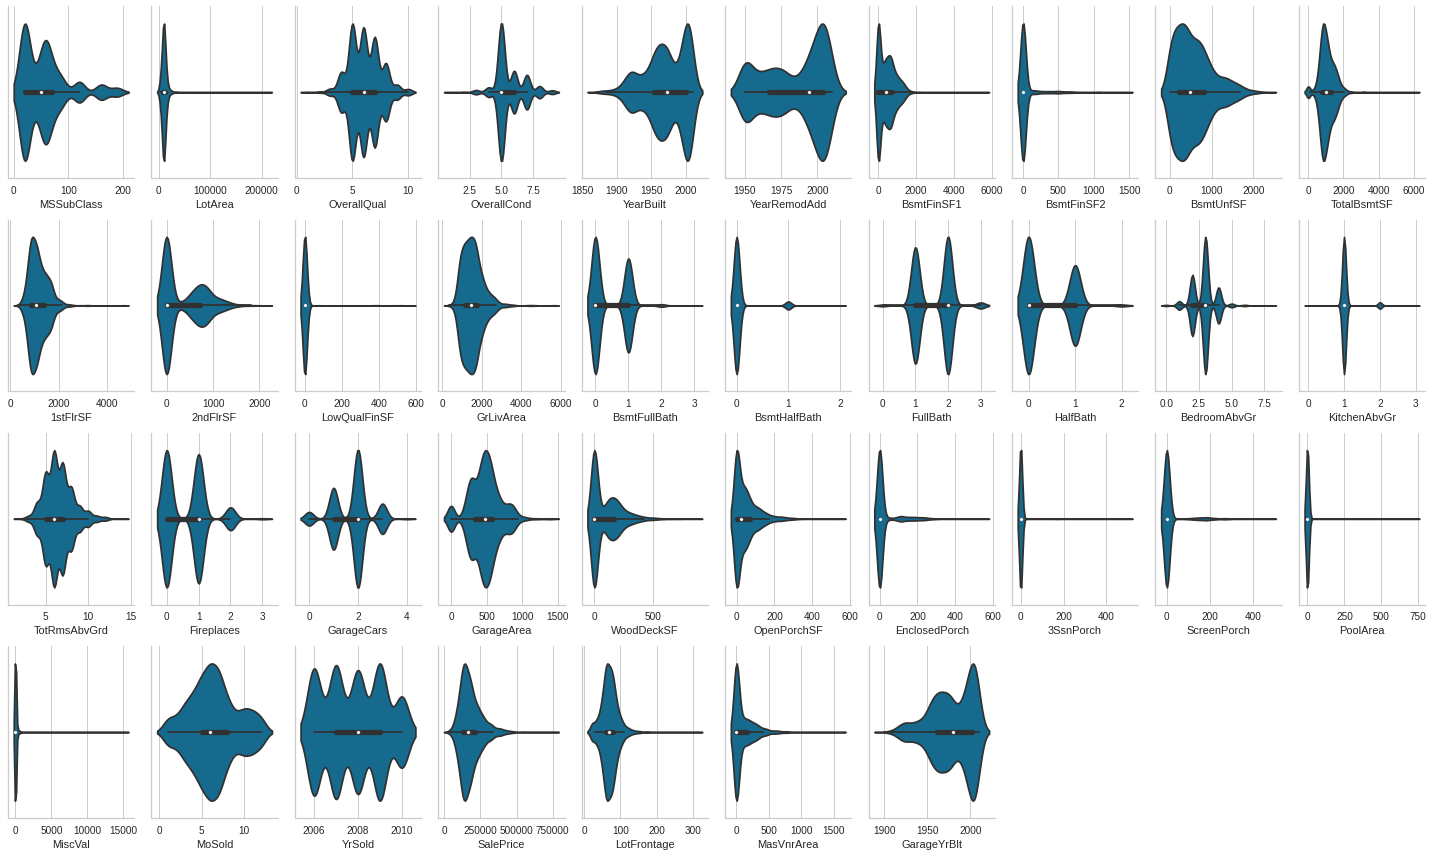

In [7]:
index_int_float = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
        'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

plt.figure(figsize=[20,12])
i = 1
for col in index_int_float :
    plt.subplot(4,10,i)
    sns.violinplot(x=col, data= df_train, orient='v')
    sns.despine()
    i = i+1
plt.tight_layout()
plt.show()

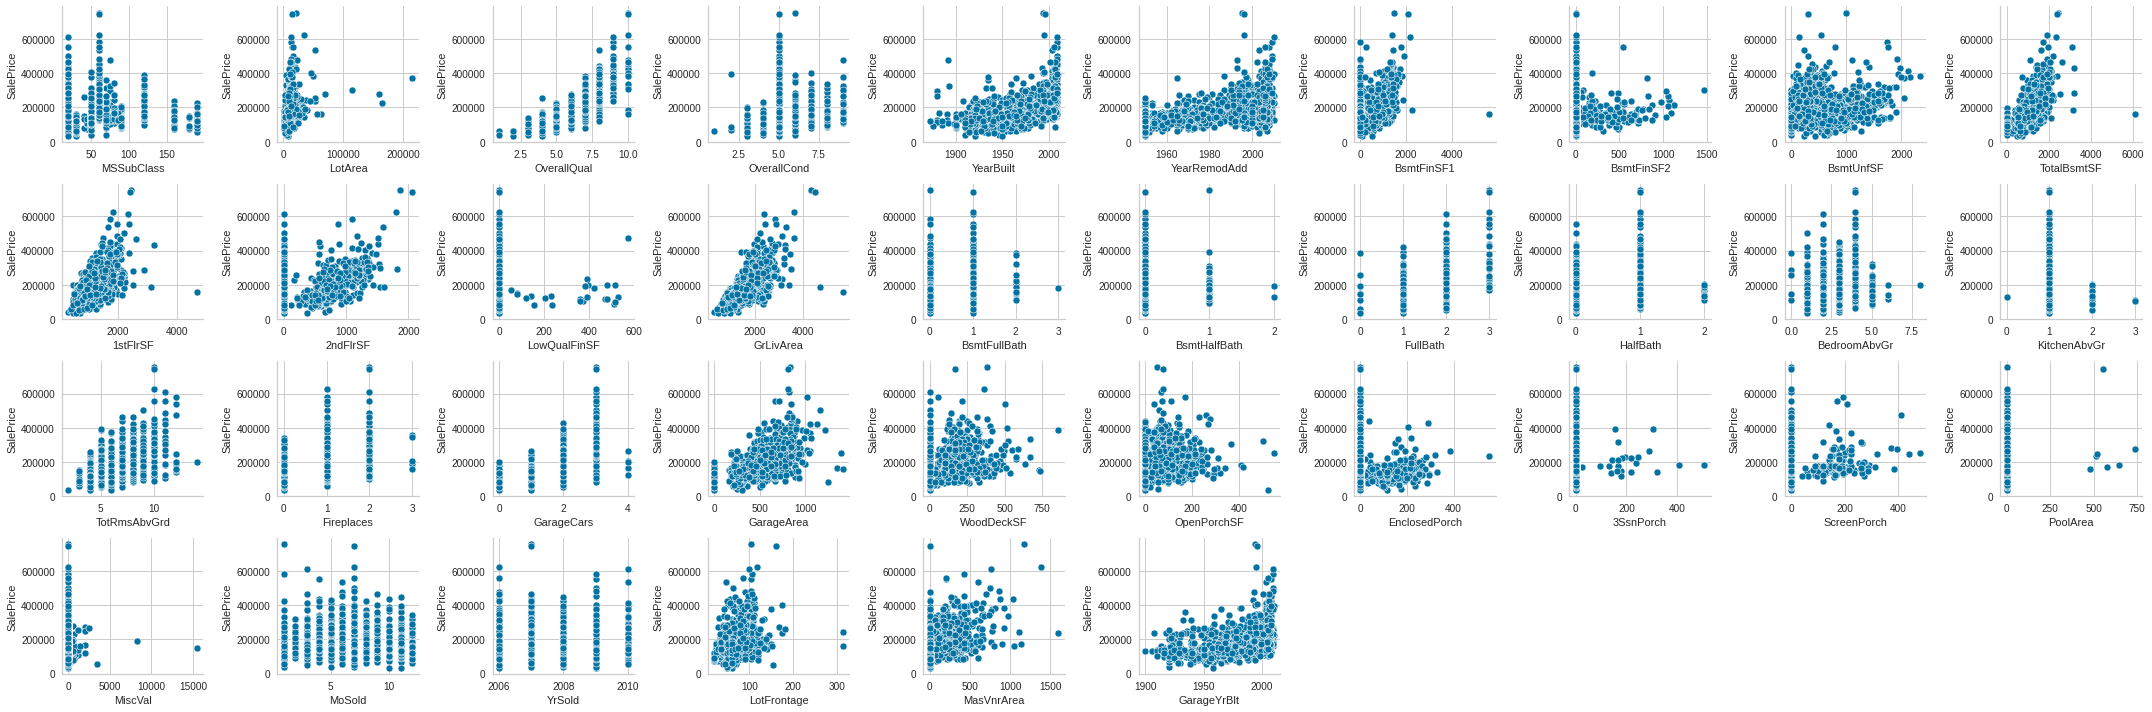

In [8]:
index_str = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

plt.figure(figsize=[30,10])
i = 1
for col in index_str :
    plt.subplot(4,10,i)
    sns.scatterplot(x=col, y = 'SalePrice' ,data= df_train)
    sns.despine()
    i = i+1
plt.tight_layout()
plt.show()

In [9]:
df_test['SalePrice'] = 'test'
df = pd.concat([df_train, df_test])
df.drop(['Id'], axis=1, inplace = True)

df['PoolQC'].fillna('No Pool', inplace = True)
df['MiscFeature'].fillna('None', inplace = True)
df['Alley'].fillna('No alley access', inplace = True)
df['Fence'].fillna('No Fence', inplace = True)
df['FireplaceQu'].fillna('No Fireplace', inplace = True)
df['LotFrontage'].fillna(60.0, inplace = True)
df['GarageCond'].fillna('No Garage', inplace = True)
df['GarageType'].fillna('No Garage', inplace = True)
df['GarageYrBlt'].fillna(1890, inplace = True)
df['GarageFinish'].fillna('No Garage', inplace = True)
df['GarageQual'].fillna('No Garage', inplace = True)
df['BsmtExposure'].fillna('No Basement', inplace = True)
df['BsmtFinType2'].fillna('No Basement', inplace = True)
df['BsmtFinType1'].fillna('No Basement', inplace = True)
df['BsmtCond'].fillna('No Basement', inplace = True)
df['BsmtQual'].fillna('No Basement', inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)
df['MasVnrType'].fillna('None', inplace = True)
# df['Exterior2nd'].fillna('None', inplace = True)
# df['Exterior1st'].fillna('None', inplace = True)
df['BsmtFullBath'].fillna(0, inplace = True) # df[df['BsmtFullBath'].isna()][['BsmtFullBath','BsmtFinType1','BsmtFinType2']]
df['BsmtHalfBath'].fillna(0, inplace = True) # df[df['BsmtFullBath'].isna()][['BsmtFullBath','BsmtFinType1','BsmtFinType2']]
# df['KitchenQual'].fillna(0, inplace = True)
  # df[(df['Neighborhood']== 'IDOTRR') | (df['Neighborhood']== 'Mitchel')]['MSZoning']
df.loc[(df['MSZoning'].isna()) & (df['Neighborhood'] == 'IDOTRR'), 'MSZoning'] = 'RM'
df.loc[(df['MSZoning'].isna()) & (df['Neighborhood'] == 'Mitchel'), 'MSZoning'] = 'RL'
df['Utilities'].fillna('AllPub', inplace = True) #la majorité
# df['BsmtHalfBath'].fillna(0.0, inplace = True) #la majorité
# df['BsmtFullBath'].fillna(0.0, inplace = True)
df['Functional'].fillna('Typ', inplace = True)
df['Exterior1st'].fillna('VinylSd', inplace = True)
df['Exterior2nd'].fillna('VinylSd', inplace = True)
df['TotalBsmtSF'].fillna(0, inplace = True)
df['BsmtUnfSF'].fillna(0, inplace = True)
df['BsmtFinSF2'].fillna(0, inplace = True)
df['GarageArea'].fillna(0, inplace = True)
df['GarageCars'].fillna(0, inplace = True)
df['KitchenQual'].fillna('TA', inplace = True)
df['BsmtFinSF1'].fillna(0, inplace = True)
df['SaleType'].fillna('WD', inplace = True)
df['Electrical'].fillna('SBrkr', inplace = True)
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)

print('Filling of Missing Data, Done.')

df['BsmtExposure'] = df['BsmtExposure'].map({'No Basement' : 0 ,'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4})
df['KitchenQual'] = df['KitchenQual'].map({'Po' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['GarageYrBlt_Years'] =  abs(1890.0 - df['GarageYrBlt'])
df['YearBuilt_Years'] = abs(1872.0 - df['YearBuilt'])
df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)
df['YearBuilt'] = df['YearBuilt'].astype(str)

tmp = df['MoSold'].map({ 1: 0.0833, 2: 0.1666, 3: 0.25, 4: 0.3333, 5: 0.4166, 6: 0.50, 7: 0.5833, 8: 0.6666, 9: 0.75, 10: 0.8333
      , 11: 0.9166
      , 12: 0.9999})
df['YearSold'] = abs(2006.0 - (df['YrSold'] + tmp)).astype(float)
df['MoSold'] = df['MoSold'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)

criteria = [df['YearRemodAdd'] == df['YearBuilt'], df['YearRemodAdd'] != df['YearBuilt']]
values = [0, 1]

df['Remod'] = np.select(criteria, values, 0)
df['YearRemod'] = (df['YearRemodAdd'].astype(int) - df['YearBuilt'].astype(int)).astype(int)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)
df['YearBuilt'] = df['YearBuilt'].astype(str)

df['Street'] = df['Street'].map({'Grvl': 0, 'Pave' : 1})
df['Alley'] = df['Alley'].map({'Grvl': 1, 'Pave' : 2 , 'No alley access' : 0 })
df['LotShape'] = df['LotShape'].map({'IR3': 0, 'IR2' : 1 , 'IR1' : 2 , 'Reg' : 3})
df['LandContour'] = df['LandContour'].map({'Low': 0, 'HLS' : 1 , 'Bnk' : 2 , 'Lvl' : 3})
df['Utilities'] = df['Utilities'].map({'ELO': 0, 'NoSeWa' : 1 , 'NoSewr' : 2 , 'AllPub' : 3})
# df['LotConfig'] = df['LotConfig'].map({'ELO': 0, 'NoSeWa' : 1 , 'NoSewr' : 2 , 'AllPub' : 3})
df['LandSlope'] = df['LandSlope'].map({'Gtl': 2, 'Mod' : 1 , 'Sev' : 0})
criteria = [
#AA
((df['Condition1'] == 'Artery') | (df['Condition1'] == 'RRAn') | (df['Condition1'] == 'PosA') | (df['Condition1'] == 'RRAe'))
&
((df['Condition2'] == 'Artery') | (df['Condition2'] == 'RRAn') | (df['Condition2'] == 'PosA') | (df['Condition2'] == 'RRAe'))
,
#AB
((df['Condition1'] == 'Artery') | (df['Condition1'] == 'RRAn') | (df['Condition1'] == 'PosA') | (df['Condition1'] == 'RRAe'))
&
((df['Condition2'] == 'Feedr') | (df['Condition2'] == 'RRNn') | (df['Condition2'] == 'PosN') | (df['Condition2'] == 'RRNe'))
,
#BA
((df['Condition2'] == 'Artery') | (df['Condition2'] == 'RRAn') | (df['Condition2'] == 'PosA') | (df['Condition2'] == 'RRAe'))
&
((df['Condition1'] == 'Feedr') | (df['Condition1'] == 'RRNn') | (df['Condition1'] == 'PosN') | (df['Condition1'] == 'RRNe'))
,
#BB
((df['Condition1'] == 'Feedr') | (df['Condition1'] == 'RRNn') | (df['Condition1'] == 'PosN') | (df['Condition1'] == 'RRNe'))
&
((df['Condition2'] == 'Feedr') | (df['Condition2'] == 'RRNn') | (df['Condition2'] == 'PosN') | (df['Condition2'] == 'RRNe'))
,
#A0
((df['Condition1'] == 'Artery') | (df['Condition1'] == 'RRAn') | (df['Condition1'] == 'PosA') | (df['Condition1'] == 'RRAe'))
&
(df['Condition2'] == 'Norm')
,
#0A
((df['Condition2'] == 'Artery') | (df['Condition2'] == 'RRAn') | (df['Condition2'] == 'PosA') | (df['Condition2'] == 'RRAe'))
&
(df['Condition1'] == 'Norm' )
,
#B0
((df['Condition1'] == 'Feedr') | (df['Condition1'] == 'RRNn') | (df['Condition1'] == 'PosN') | (df['Condition1'] == 'RRNe'))
&
(df['Condition2'] == 'Norm' )
,
#0B
((df['Condition2'] == 'Feedr') | (df['Condition2'] == 'RRNn') | (df['Condition2'] == 'PosN') | (df['Condition2'] == 'RRNe'))
&
(df['Condition1'] == 'Norm')
,
#00
(df['Condition1'] == 'Norm' )
&
(df['Condition2'] == 'Norm' )
]
values = [4,3,3,2,2,2,1,1,0]
df['conditions'] = np.select(criteria, values, 10)

df['Exterior2nd'] = df['Exterior2nd'].map({ 'AsbShng': 'AsbShng', 'AsphShn': 'AsphShn', 'Brk Cmn': 'BrkComm', 'BrkFace': 'BrkFace', 'CBlock': 'CBlock', 'CmentBd': 'CemntBd',
                       'HdBoard': 'HdBoard', 'ImStucc': 'ImStucc', 'MetalSd': 'MetalSd', 'Plywood': 'Plywood'
                      , 'Stone': 'Stone'
                      , 'Stucco': 'Stucco'
                      ,'VinylSd': 'VinylSd'
                      ,'Wd Sdng': 'Wd Sdng'
                      ,'Wd Shng': 'WdShing'
                      , 'None'  : 'None'
                      , 'Other' :  'Other'})

criteria = [
# Only 1
((df['Exterior1st'] == df['Exterior2nd']) | (df['Exterior2nd'] !=  'Other'))
,
# No One
(df['Exterior1st'] == 'None') &  (df['Exterior2nd'] == 'None')
,
# 2
(df['Exterior1st'] !=  df['Exterior2nd']) 
]

values = [1,0,2]
df['Exterior'] = np.select(criteria, values, 10)

criteria = [
# Have veneer 
(df['MasVnrType'] != 'None')
,
# Havnt veneer    
(df['MasVnrType'] == 'None')
]
values = [1,0]
df['veneer'] = np.select(criteria, values, 10)

df['ExterQual'] = df['ExterQual'].map({'Po' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['ExterCond'] = df['ExterCond'].map({'Po' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['BsmtQual'] = df['BsmtQual'].map({'No Basement' : 0 ,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})

df['BsmtFinType1'] = df['BsmtFinType1'].map({'No Basement' : 0 ,'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ': 6})

df['BsmtFinType2'] = df['BsmtFinType2'].map({'No Basement' : 0 ,'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ': 6})

criteria = [
# No Bsmt
(df['BsmtFinType1'] == 0) & (df['BsmtFinType2'] == 0)
,
# 1 Bsmt   
((df['BsmtFinType1'] != 0) & (df['BsmtFinType2'] != 0) & (df['BsmtFinType1'] == df['BsmtFinType2']))
|
((df['BsmtFinType1'] != 0) & (df['BsmtFinType2'] == 0))
|
((df['BsmtFinType1'] == 0) & (df['BsmtFinType2'] != 0)) 
,
# 2 bsmnt
(df['BsmtFinType1'] != 0) & (df['BsmtFinType2'] != 0) & (df['BsmtFinType1'] != df['BsmtFinType2'])
]

values = [0,1,2]
df['Bsmt'] = np.select(criteria, values, 10)

df['HeatingQC'] = df['HeatingQC'].map({'Po' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['CentralAir'] = df['CentralAir'].map({'N' : 0 ,'Y' : 1})

df['FireplaceQu'] = df['FireplaceQu'].map({'No Fireplace' : 0 ,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4 , 'Ex' : 5})

df['Functional'] = df['Functional'].map({'Sal' : 0 ,'Sev' : 1, 'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4 , 'Min2' : 5, 'Min1' : 6, 'Typ' : 7})

criteria = [
# No garage
df['GarageType'] == 'No Garage'
,
#2 garages
df['GarageType'] == '2Types'
,
# only one garage
(df['GarageType'] != '2Types') & (df['GarageType'] != 'No Garage')
]
values = [0,2,1]
df['Garage'] = np.select(criteria, values, 10)

df['GarageFinish'] = df['GarageFinish'].map({'No Garage' : 0 ,'Unf' : 1, 'RFn' : 2, 'Fin' : 3})

df['GarageQual'] = df['GarageQual'].map({'No Garage' : 0 ,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4 , 'Ex' :5})

df['GarageCond'] = df['GarageCond'].map({'No Garage' : 0 ,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4 , 'Ex' :5})

df['PavedDrive'] = df['PavedDrive'].map({'N' : 0 ,'P' : 1, 'Y' : 2})

df['PoolQC'] = df['PoolQC'].map({'No Pool' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['Fence'] = df['Fence'].map({'No Fence' : 0 ,'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4})

criteria = [
# No Feature
df['MiscFeature'] == 'None'
,
# with Feature
df['MiscFeature'] != 'None'
]
values = [0,1]
df['Feature'] = np.select(criteria, values, 10)
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] +df['GarageArea']
df['Bathrooms'] = df['FullBath'] + df['HalfBath']*0.5 
df['Year average']= (df['YearRemodAdd'].astype(int)+df['YearBuilt'].astype(int))/2

df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df_train.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

print('Adding New Features, Done.')

df_train = df[df['SalePrice'] != 'test']
df_test = df[df['SalePrice'] == 'test']
df_train['SalePrice'] = df_train['SalePrice'].astype(float)

# to reduce the skewness of the saleprice it is necessary to apply the logarithm function on the saleprice. 
# More details are on this notebook: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
df_train['SalePrice'] =  np.log(df_train['SalePrice'])
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

print('Adjustment of Skewness, Done.')

Filling of Missing Data, Done.
Adding New Features, Done.
Adjustment of Skewness, Done.


In [10]:
int_features = ['LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LandSlope', 'OverallQual', 'ExterQual', 'ExterCond', 'BsmtQual',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
        'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'PoolQC', 'Fence', 'MiscVal', 'Remod', 'YearRemod',
        'conditions', 'Exterior', 'veneer', 'Bsmt', 'Garage', 'Feature',
        'HasBsmt']

float_feartues = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'GarageCars', 'GarageArea', 'GarageYrBlt_Years', 'YearBuilt_Years',
        'YearSold', 'TotalArea', 'Bathrooms', 'Year average']

obj_features = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'Foundation', 'BsmtCond', 'Heating', 'Electrical',
        'GarageType', 'GarageYrBlt', 'MiscFeature', 'MoSold', 'YrSold',
        'SaleType', 'SaleCondition']

exp_reg = setup(df_train, #Train Data
                target = 'SalePrice',  #Target
                categorical_features = obj_features, # Categorical Features
                numeric_features = int_features + float_feartues, # Numeric Features
                normalize = True, # Normalize Dataset
                remove_outliers = True, # Remove 5% Outliers
                remove_multicollinearity = True, # Remove Multicollinearity
                silent = True # Process Automation
               )

,Description,Value
0,session_id,8316
1,Target,SalePrice
2,Original Data,"(1460, 95)"
3,Missing Values,False
4,Numeric Features,67
5,Categorical Features,27
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(970, 443)"


In [11]:
compare_models(exclude = ['tr'], sort = 'RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,8.430000e-02,1.710000e-02,1.256000e-01,8.823000e-01,0.0097,7.100000e-03,0.286
gbr,Gradient Boosting Regressor,8.730000e-02,1.800000e-02,1.318000e-01,8.812000e-01,0.0102,7.300000e-03,0.640
omp,Orthogonal Matching Pursuit,8.780000e-02,1.990000e-02,1.363000e-01,8.649000e-01,0.0105,7.300000e-03,0.042
lightgbm,Light Gradient Boosting Machine,9.020000e-02,1.890000e-02,1.353000e-01,8.762000e-01,0.0105,7.600000e-03,0.245
ridge,Ridge Regression,9.410000e-02,1.960000e-02,1.365000e-01,8.650000e-01,0.0105,7.900000e-03,0.041
et,Extra Trees Regressor,9.170000e-02,1.930000e-02,1.371000e-01,8.734000e-01,0.0106,7.700000e-03,2.392
rf,Random Forest Regressor,9.660000e-02,2.110000e-02,1.435000e-01,8.611000e-01,0.0111,8.100000e-03,2.186
ada,AdaBoost Regressor,1.266000e-01,2.880000e-02,1.685000e-01,8.106000e-01,0.0131,1.060000e-02,0.492
knn,K Neighbors Regressor,1.266000e-01,3.400000e-02,1.831000e-01,7.773000e-01,0.0142,1.060000e-02,0.106
huber,Huber Regressor,1.106000e-01,3.510000e-02,1.808000e-01,7.701000e-01,0.0142,9.200000e-03,0.321


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [12]:
model_br = create_model('br')
model_lightgbm = create_model('lightgbm')
# model_xgboost = create_model('xgboost') -> Estimator xgboost not available.
model_ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1014,0.0170,0.1302,0.8967,0.0101,0.0084
1,0.1135,0.0474,0.2178,0.5917,0.0162,0.0095
2,0.0810,0.0138,0.1174,0.9255,0.0090,0.0067
3,0.0761,0.0110,0.1047,0.9175,0.0081,0.0064
4,0.0996,0.0215,0.1465,0.8805,0.0113,0.0083
5,0.0972,0.0177,0.1331,0.8650,0.0105,0.0082
6,0.0873,0.0130,0.1142,0.9233,0.0088,0.0073
7,0.1071,0.0255,0.1596,0.8730,0.0126,0.0091
8,0.0871,0.0134,0.1159,0.8851,0.0088,0.0072
9,0.0908,0.0158,0.1259,0.8915,0.0099,0.0076


In [13]:
# The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.
# tuned_br = tune_model('br')을 tuned_br = tune_model(model_br)로 바꿔줌

tuned_br = tune_model(model_br)
tuned_lightgbm = tune_model(model_lightgbm)
# tuned_xgboost = tune_model(model_xgboost)
tuned_ridge = tune_model(model_ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0939,0.0155,0.1244,0.9058,0.0096,0.0078
1,0.1069,0.0463,0.2153,0.6011,0.0160,0.0090
2,0.0760,0.0116,0.1077,0.9373,0.0082,0.0063
3,0.0722,0.0104,0.1022,0.9215,0.0079,0.0060
4,0.0888,0.0149,0.1220,0.9171,0.0096,0.0075
5,0.0930,0.0160,0.1266,0.8778,0.0100,0.0079
6,0.0799,0.0112,0.1056,0.9343,0.0082,0.0066
7,0.1074,0.0280,0.1674,0.8601,0.0133,0.0091
8,0.0804,0.0116,0.1079,0.9005,0.0082,0.0066
9,0.0870,0.0152,0.1233,0.8959,0.0097,0.0073


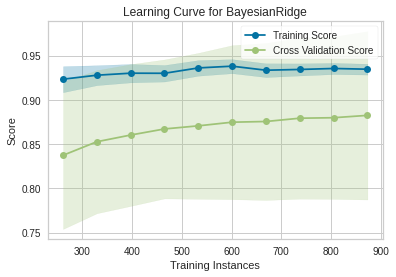

In [14]:
plot_model(tuned_br, plot = 'learning')

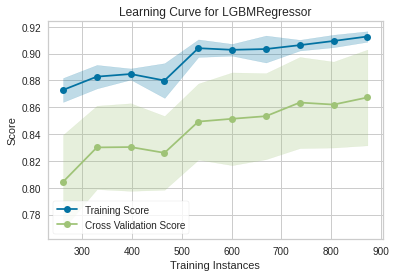

In [15]:
plot_model(tuned_lightgbm, plot = 'learning')

In [16]:
plot_model(tuned_xgboost, plot = 'learning')

NameError: ignored

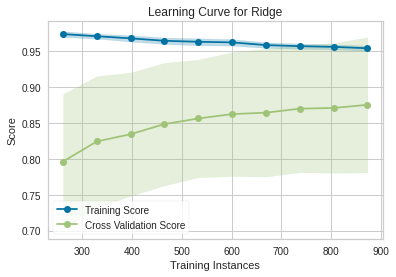

In [17]:
plot_model(tuned_ridge, plot = 'learning')

In [18]:
blender = blend_models(estimator_list = [tuned_br, tuned_lightgbm, tuned_ridge])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0885,0.0137,0.1172,0.9164,0.0091,0.0074
1,0.0959,0.0350,0.1870,0.6990,0.0139,0.0080
2,0.0737,0.0108,0.1041,0.9415,0.0080,0.0061
3,0.0691,0.0097,0.0984,0.9272,0.0076,0.0058
4,0.0779,0.0137,0.1170,0.9238,0.0094,0.0066
5,0.0867,0.0146,0.1207,0.8890,0.0096,0.0074
6,0.0764,0.0108,0.1037,0.9367,0.0080,0.0063
7,0.1016,0.0301,0.1735,0.8498,0.0138,0.0086
8,0.0691,0.0088,0.0937,0.9249,0.0071,0.0057
9,0.0810,0.0140,0.1185,0.9038,0.0093,0.0068


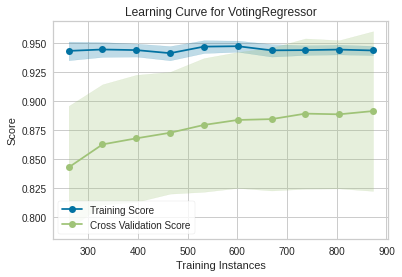

None

In [19]:
display(plot_model(blender, plot = 'learning'))

In [20]:

predictions = predict_model(blender, data = df_test)
df_sample_submission['SalePrice'] = np.expm1(predictions['Label'])
df_sample_submission.to_csv('submission.csv',index=False)